In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ordpy
from tqdm import tqdm

In [2]:
def logistic(r,x):
    return r*x*(1-x)

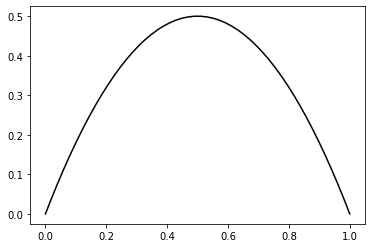

In [3]:
# Plot map
x = np.linspace(0,1)
plt.plot(x,logistic(2,x),c='k')

In [4]:
# Iterate function for a given r
def logistic_orbit(r,n_iter,x_0):
    time_series = []
    x_0 = 0.4
    
    time_series.append(x_0)
    for i in range(n_iter):
        previous = time_series[i]
        new = logistic(r,previous)
        time_series.append(new)
    
    return time_series

In [5]:
def bifurcation_diagram(r_min,r_max,r_num,map_iter,last):
    r = np.linspace(r_min, r_max, r_num)
    
    x = 0.4*np.ones(r_num)
    
    #fig, ax1 = plt.subplots(1, 1, figsize=(8, 9))
    test = []
    for i in range(map_iter):
        x = logistic(r, x)
        # We display the bifurcation diagram.
        if i >= (map_iter - last):
            test.append(x)
            #ax1.plot(r, x, ',k', alpha=.25)
            
    return r,test

In [6]:
def lyapunov_exponent(r_min,r_max,r_num,map_iter):
    r = np.linspace(r_min,r_max,r_num)
    x = 1e-5*np.ones(r_num)
    
    lyapunov = np.zeros(r_num)
    for i in range(map_iter):
        x = logistic(r,x)
        lyapunov += np.log(abs(r-2*r*x))
        
    lyapunov = list(lyapunov)
    lyapunov = [i/map_iter for i in lyapunov]
    
    return r,lyapunov

In [7]:
r,bifurcations = bifurcation_diagram(2.5,4.0,10000,100000,100)
r,lyapunovs = lyapunov_exponent(2.5,4.0,10000,100000)

In [11]:
def permutation_entropy_plot(r_min,r_max,r_num,map_iter,window_length):
    r = np.linspace(r_min,r_max,r_num)
    entropy_logistic = []
    for i in tqdm(range(len(r))):
        data = logistic_orbit(r[i],map_iter,0.4)
        entropy_logistic += [ordpy.permutation_entropy(data, dx=window_length, base=2, normalized=False)/(window_length-1)]
    
    return entropy_logistic

In [14]:
window_length_6 = permutation_entropy_plot(2.5,4,10000,99999,6)

In [21]:
x_windows = [3.626,3.635,3.738,3.745,3.828,3.856]

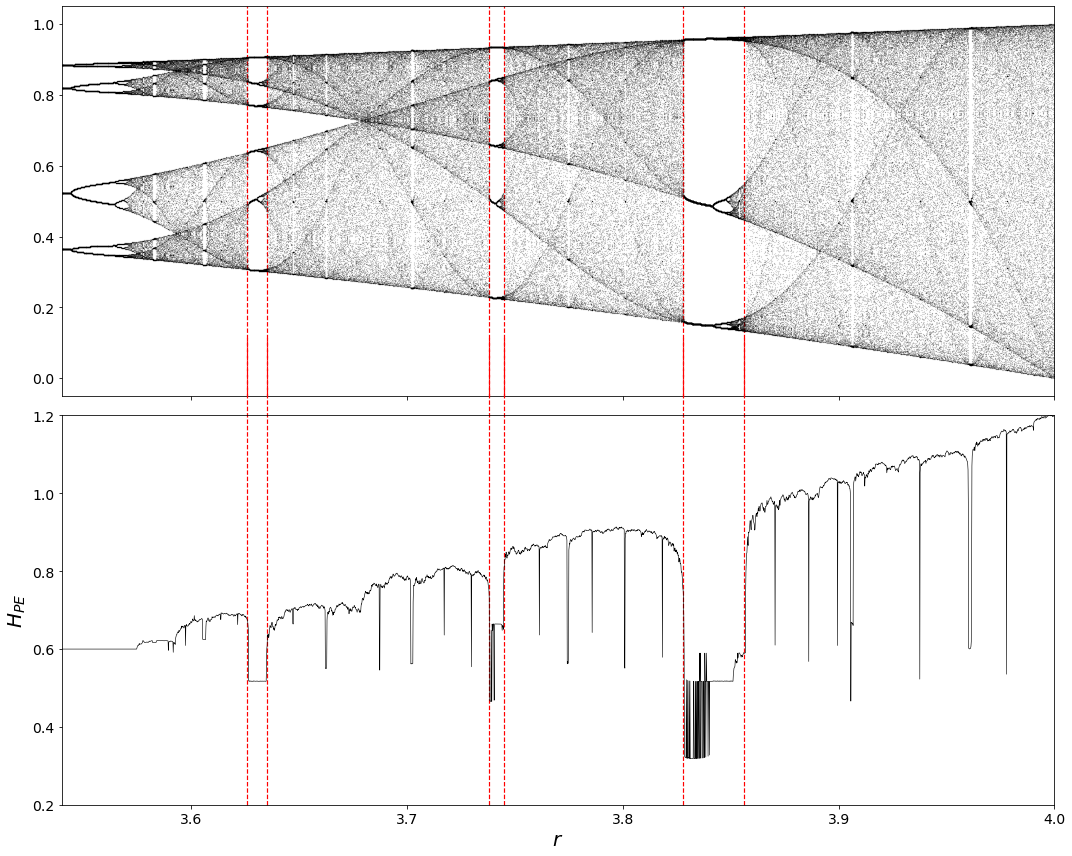

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12),sharex=True)
for  i in range(len(bifurcations)):
    ax1.scatter(r, bifurcations[i],s=0.0025,c='k')
    ax1.set_xlim([3.54,4])

ax2.plot(r,permutation_entropy_6,c='k',linewidth=0.6)
ax2.set_xlim([3.54,4])
ax2.set_ylim([0.2,1.2])
ax2.set_ylabel(r'$H_{PE}$',fontsize=20)
ax1.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax2.set_xlabel(r'$r$', fontsize=20)
for i in range(len(x_windows)):
    ax1.axvline(x=x_windows[i],linestyle='--',ymin=0,ymax=1,c="red",linewidth=1.2,zorder=0, clip_on=False)
    ax2.axvline(x=x_windows[i],linestyle='--',ymax=1.2,c="red",linewidth=1.2,zorder=0, clip_on=False)

fig.tight_layout()

#plt.savefig('logistic_bifurcation_hpe.png')